In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import numpy as np

In [2]:
lines = [tuple(line.strip().split(',')) for line in open('data.txt', 'r').readlines()]
x, y = zip(*lines)
print(x,y)

(('2.129277', '1.384184', '1.308407', '1.541149', '2.283363', '2.231746', '1.692242', '2.281742', '1.763310', '1.826291', '2.084147', '2.076752', '1.840563', '1.673296', '1.877151', '1.846413', '1.993577', '1.473315', '2.011389', '1.371928', '1.580634', '1.855154', '2.260078', '1.786506', '1.441641', '1.482508', '1.813362', '2.256144', '1.533141', '2.294717', '1.603792', '1.567880', '2.094903', '1.729764', '2.122630', '1.971668', '1.921940', '1.422548', '2.118497', '1.576996', '1.362119', '1.648325', '1.593174', '2.151376', '2.266421', '2.070137', '2.082471', '1.912995', '2.112866', '1.497708', '1.947345', '1.839918', '2.261268', '1.764957', '1.829727', '1.855274', '1.645406', '1.394519', '1.346426', '1.889624', '1.606434', '1.957878', '2.212119', '1.758511', '2.088455', '2.043598', '1.997917', '2.185762', '2.181931', '1.425508', '1.766771', '1.987547', '1.483936', '2.232438', '1.745342', '1.628934', '1.995196', '2.256097', '1.606944', '1.720547', '1.550944', '1.538661', '2.062001', '1

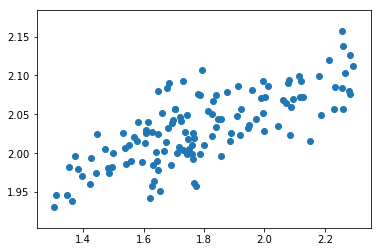

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
X_train = np.array(list(x[:100]), dtype=float).reshape((-1, 1))
X_train = np.concatenate((X_train, np.arange(0, 100).reshape((-1, 1))/200.0), axis=1)
X_train = np.repeat(X_train, 10, axis=0)
np.random.shuffle(X_train)
Y_train = np.array(list(y[:100]), dtype=float).reshape((-1, 1))
Y_train = np.repeat(Y_train, 10, axis=0)
np.random.shuffle(Y_train)

In [16]:
X_train.shape

(1000, 2)

In [5]:
X_test = np.array(list(x[100:]), dtype=float).reshape((-1, 1))
X_test = np.concatenate((X_test, np.arange(100, 129).reshape((-1, 1))/200.0), axis=1)
Y_test = np.array(list(y[100:]), dtype=float).reshape((-1, 1))

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
modelMLP = MLPRegressor(learning_rate_init=0.0002, hidden_layer_sizes=(3, 3))
modelMLP.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='constant',
       learning_rate_init=0.0002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [15]:
modelSVM = SVR()
modelSVM.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

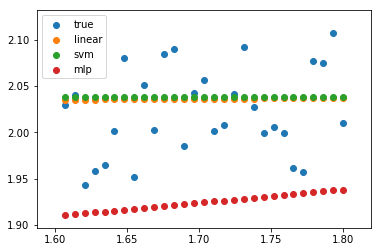

In [17]:
Y_linreg = model.predict(X_test)
Y_svm = modelSVM.predict(X_test)
Y_MLP = modelMLP.predict(X_test)
plt.scatter(X_test[:, 0], Y_test, label="true")
plt.scatter(X_test[:, 0], Y_linreg, label="linear")
plt.scatter(X_test[:, 0], Y_svm, label="svm")
plt.scatter(X_test[:, 0], Y_MLP, label="mlp")
plt.legend()
plt.show()

In [ ]:
Y_predicted = model.predict(X_train)
plt.scatter(X_test[:, 0], Y_test, label="true")
plt.scatter(X_test[:, 0], Y_predicted, label="svm")
plt.legend()
plt.show()

In [ ]:
Y_predicted = model.predict(X)
plt.scatter(X, Y, label="true")
plt.scatter(X, Y_predicted, label="predicted")
plt.show()

In [ ]:
Y_predicted = model.predict(X)
plt.scatter(np.arange(29), Y[-29:], label="true")
plt.show()